In [1]:
import pandas as pd

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_blobs
df=make_blobs(n_samples=100,n_features=2,cluster_std=1.0,centers=2,random_state=100)

In [6]:
X,y=df

In [7]:
X

array([[ 3.36818459e-01, -3.40287961e+00],
       [-1.08726796e+00,  5.80147972e+00],
       [-1.93336328e+00,  5.70953908e+00],
       [-1.63584937e+00,  8.88579630e+00],
       [ 5.41860777e-01, -4.37693628e+00],
       [ 2.66345400e-01,  7.40859703e+00],
       [ 1.64692124e+00, -4.00437943e+00],
       [ 5.36321701e-01, -5.12183028e+00],
       [ 4.10071850e-01, -3.99744881e+00],
       [-3.39121202e-01,  8.97323488e+00],
       [ 1.84941962e+00, -3.91839346e+00],
       [-7.56585997e-01,  5.28608375e+00],
       [-8.36552370e-01, -5.56887330e+00],
       [ 2.84503785e-01, -3.61576523e+00],
       [ 1.44867217e+00, -5.53713539e+00],
       [ 2.74467226e+00, -4.80951565e+00],
       [ 1.59909918e+00, -3.07105617e+00],
       [-1.31673099e+00,  6.54706372e+00],
       [-1.68442974e+00,  7.91278699e+00],
       [ 1.10594346e+00, -4.41906375e+00],
       [ 2.48708050e+00, -2.89100712e+00],
       [ 5.87148931e-03, -3.18314256e+00],
       [ 1.61854360e+00, -4.88855923e+00],
       [-7.

In [13]:
z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)

In [14]:
z_noise

0     0.254289
1     0.592480
2    -1.396485
3    -1.070839
4    -0.778332
        ...   
95   -0.142400
96   -1.323575
97    0.665890
98   -0.262321
99   -1.402984
Length: 100, dtype: float64

In [17]:
df=pd.DataFrame(X,y)

In [19]:
df['noise']=z_noise

In [20]:
df

,0,1,noise
0,0.336818,-3.402880,0.254289
1,-1.087268,5.801480,0.592480
1,-1.933363,5.709539,0.592480
1,-1.635849,8.885796,0.592480
0,0.541861,-4.376936,0.254289
...,...,...,...
1,-1.192280,6.143108,0.592480
0,0.875413,-5.045551,0.254289
0,1.481138,-3.696407,0.254289
0,2.902706,-4.983327,0.254289


In [21]:
df.columns=['x','y','noise']

In [22]:
df

,x,y,noise
0,0.336818,-3.402880,0.254289
1,-1.087268,5.801480,0.592480
1,-1.933363,5.709539,0.592480
1,-1.635849,8.885796,0.592480
0,0.541861,-4.376936,0.254289
...,...,...,...
1,-1.192280,6.143108,0.592480
0,0.875413,-5.045551,0.254289
0,1.481138,-3.696407,0.254289
0,2.902706,-4.983327,0.254289


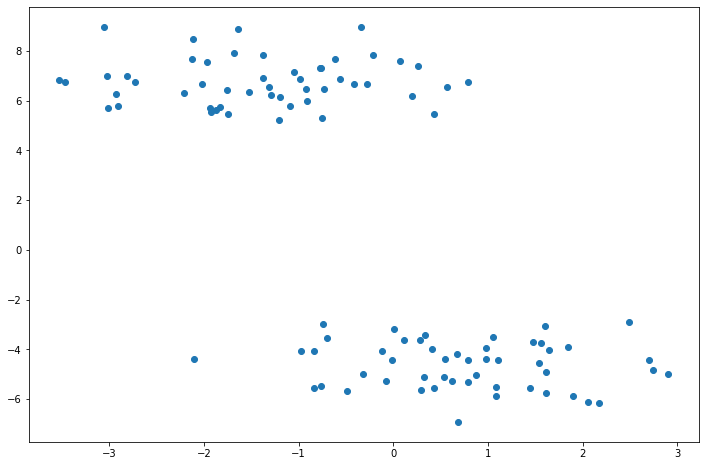

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(df['x'],df['y'])

In [53]:
import seaborn as sns

In [76]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [86]:
encoder=Sequential()

encoder.add(Dense(2,activation='relu',input_shape=[3]))

decoder=Sequential()

decoder.add(Dense(3,activation='relu',input_shape=[2]))

In [87]:
autoencoder=Sequential([encoder,decoder])

In [88]:
autoencoder.compile(optimizer='adam',loss='mse')

In [89]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [90]:
scaled_df=minmax.fit_transform(df)

In [91]:
autoencoder.fit(scaled_df,scaled_df,epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 13ms/step - loss: 0.3799
Epoch 2/5
4/4 [==============================] - 0s 4ms/step - loss: 0.3782
Epoch 3/5
4/4 [==============================] - 0s 5ms/step - loss: 0.3764
Epoch 4/5
4/4 [==============================] - 0s 9ms/step - loss: 0.3749
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 0.3733


In [97]:
encoder_2dim=autoencoder.predict(scaled_df)

In [98]:
encoder_2dim.shape

(100, 3)

In [96]:
scaled_df.shape

(100, 3)

In [99]:
encoder_2dim

array([[-0.        ,  0.25979346, -0.        ],
       [-0.        ,  0.0846673 , -0.        ],
       [-0.        ,  0.04158616, -0.        ],
       [-0.        ,  0.09613524, -0.        ],
       [-0.        ,  0.2577474 , -0.        ],
       [-0.        ,  0.1718874 , -0.        ],
       [-0.        ,  0.3171785 , -0.        ],
       [-0.        ,  0.24813774, -0.        ],
       [-0.        ,  0.25597233, -0.        ],
       [-0.        ,  0.16149144, -0.        ],
       [-0.        ,  0.32829106, -0.        ],
       [-0.        ,  0.09459545, -0.        ],
       [-0.        ,  0.17450146, -0.        ],
       [-0.        ,  0.25453305, -0.        ],
       [-0.        ,  0.28814524, -0.        ],
       [-0.        ,  0.36148828, -0.        ],
       [-0.        ,  0.32650524, -0.        ],
       [-0.        ,  0.08263989, -0.        ],
       [-0.        ,  0.08153384, -0.        ],
       [-0.        ,  0.28517306, -0.        ],
       [-0.        ,  0.37276626, -0.   

In [100]:
scaled_df

array([[0.60079803, 0.22128513, 0.        ],
       [0.37923804, 0.80043067, 1.        ],
       [0.24760216, 0.79464569, 1.        ],
       [0.29388951, 0.9944983 , 1.        ],
       [0.6326986 , 0.15999671, 0.        ],
       [0.5898338 , 0.90155175, 1.        ],
       [0.80462439, 0.18343828, 0.        ],
       [0.63183683, 0.1131274 , 0.        ],
       [0.61219483, 0.18387436, 0.        ],
       [0.49563504, 1.        , 1.        ],
       [0.83612918, 0.18884859, 0.        ],
       [0.43068569, 0.76800155, 1.        ],
       [0.41824448, 0.0849991 , 0.        ],
       [0.59265889, 0.2078902 , 0.        ],
       [0.77378072, 0.08699607, 0.        ],
       [0.97541298, 0.13277848, 0.        ],
       [0.79718422, 0.24216372, 0.        ],
       [0.34353808, 0.8473434 , 1.        ],
       [0.28633135, 0.93327578, 1.        ],
       [0.72045884, 0.15734602, 0.        ],
       [0.93533674, 0.25349255, 0.        ],
       [0.54930916, 0.23511115, 0.        ],
       [0.